Raphael Razafindralambo: Comp Stat TP1

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sgd(x,y,alpha=1, epochs=1000, tol=1e-6):
    n_samples, n_features = x.shape
    w = np.zeros(n_features)
    for k in range(epochs):
        e = 1/(k+1)**alpha
        #Loi uniforme sur les (xi,yi)
        i = np.random.choice(np.arange(len(x)))
        xk = x[i]
        yk = y[i]
    
        g = -2*xk*(yk-np.dot(w,xk))

        w -= e*g
    return w

### Question 2

In [3]:
def generate_samples(n_samples, w):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = np.sign(np.dot(X, w))
    return X, y

# Generate a set of observations with a given normal vector w
n_samples = 100
w_barre = np.array([3, 0.2])
X, y = generate_samples(n_samples, w_barre)

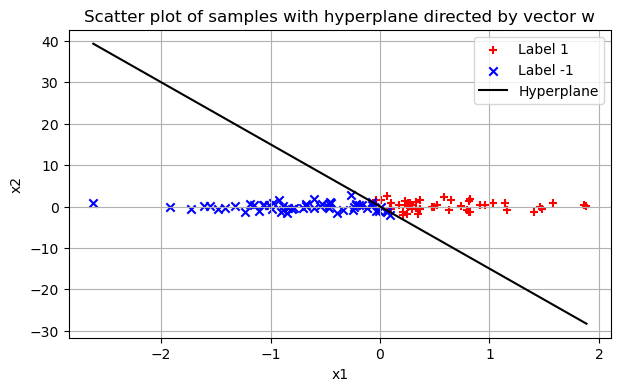

In [4]:
def plot_samples(X, y, w):
    fig, ax = plt.subplots(figsize=(7, 4))
    # Scatter plot of the points, with color according to the label
    scatter1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Label 1',marker='+')
    scatter2 = ax.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Label -1',marker='x')
    # Plot the line directed by the vector w
    xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    yy = (-w[0] * xx) / w[1]
    ax.plot(xx, yy, 'k-', label='Hyperplane')

    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Scatter plot of samples with hyperplane directed by vector w')
    ax.legend()
    plt.grid()
    plt.show()

plot_samples(X, y, w_barre)


In [5]:
w_star = sgd(X,y)
w_star

array([0.87008769, 0.07740273])

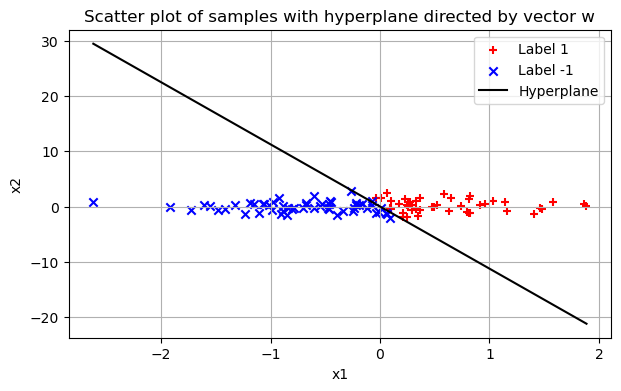

In [6]:
plot_samples(X, y, w_star)

We compare $\frac{\bar{w}}{\| \bar{w} \|}$ and $\frac{w*}{\| w* \|}$ by computing the norm of the difference (error). We observe they are close to each other. 

In [7]:
print("W_bar normalized", w_barre/np.linalg.norm(w_barre),"\nW_star normalized", w_star/np.linalg.norm(w_star))
print("Norm-2 error: ", np.linalg.norm(w_barre/np.linalg.norm(w_barre) - w_star/np.linalg.norm(w_star)))

W_bar normalized [0.99778516 0.06651901] 
W_star normalized [0.99606642 0.08860976]
Norm-2 error:  0.0221575084078562


### Question 4

In [8]:
np.random.seed(42)
noise = np.random.normal(loc=0, scale=3, size=(n_samples, 2))
X_noisy = X + noise

In [9]:
w_bar_noisy = sgd(X_noisy,y)
print("Norm-2 error: ", np.linalg.norm(w_bar_noisy/np.linalg.norm(w_bar_noisy) - w_star/np.linalg.norm(w_star)))

Norm-2 error:  0.10751778673332768


### Question 5

In [10]:
import pandas as pd

# Spécifier le chemin du fichier
file_path = 'data/breast-cancer-wisconsin.data'

# Charger le fichier dans un DataFrame pandas
data = pd.read_csv(file_path, header=None)
data = data.apply(pd.to_numeric, errors='coerce').dropna()
new_columns = [
    'Id',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]

data.columns = new_columns
# Afficher les premières lignes du DataFrame
data.head()
data.shape

(683, 11)

In [11]:
y = data["Class"]
X = data.drop("Class",axis=1).set_index("Id").values

In [12]:
np.array(y).shape,np.array(X).shape

((683,), (683, 9))

In [13]:
W = sgd(np.array(X),np.array(y))

In [14]:
print("W = ", W)

W =  [ 1.31522091e+44  1.00799254e+45 -1.05443470e+45  1.49843065e+43
 -5.13850720e+43  1.49336933e+43 -2.25444742e+44  1.83085175e+44
  1.40353960e+43]
